# Importing libraries

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Loading data

In [2]:
# Import files
path=r'C:\Users\asicz\OneDrive\Dokumenty\CareerFoundry_Data_Analyst_Course\Data Immersion\Achievement 4\20240508_Instacart_Basket_Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02_Data','Prepared_Data', 'ords_prods_merge.pkl'))
ords_prods_merge.rename(columns = {'order_dow':'order_day_of_week'}, inplace = True)

# Prepare df subset and define the function

In [3]:
# Subset the data frame - only 1st mil rows
df = ords_prods_merge[:1000000]
df.shape
df.describe()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,aisle_id,department_id,prices
count,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,936395.000000,1000000.000000,1000000.000000,1000000.000000,999047.000000,999047.000000,999047.000000,999047.000000
mean,53715.723741,53715.723741,1.711980e+06,3292.053140,17.312732,2.765291,13.416372,11.062050,25572.810576,8.311157,0.591185,25597.403581,71.056053,9.985685,11.400000
std,30834.760046,30834.760046,9.869941e+05,1865.263103,17.928260,2.091081,4.221170,8.811753,14090.836846,7.207951,0.491615,14079.435769,38.228058,6.294815,426.197447
min,0.000000,0.000000,8.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,27278.000000,27278.000000,8.620390e+05,1697.000000,5.000000,1.000000,10.000000,5.000000,13517.000000,3.000000,0.000000,13536.000000,31.000000,4.000000,4.200000
50%,53642.000000,53642.000000,1.711282e+06,3342.000000,11.000000,3.000000,13.000000,8.000000,25300.000000,6.000000,1.000000,25341.000000,83.000000,9.000000,7.400000
75%,80703.000000,80703.000000,2.563542e+06,4934.000000,24.000000,5.000000,16.000000,15.000000,37792.000000,11.000000,1.000000,37829.000000,107.000000,16.000000,11.300000
max,106886.000000,106886.000000,3.420853e+06,6467.000000,99.000000,6.000000,23.000000,30.000000,49687.000000,95.000000,1.000000,49691.000000,134.000000,21.000000,99999.000000


In [4]:
# Create a function to tag the price ranges
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

# Execute the function

In [5]:
# Run the function on the df
df['price_range'] = df.apply(price_label, axis=1)

C:\Users\asicz\AppData\Local\Temp\ipykernel_3256\2654401547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [6]:
df['price_range'].value_counts(dropna = False)
#df['prices'].max()

price_range
Mid-range product    672525
Low-range product    314109
High range            12413
Not enough data         953
Name: count, dtype: int64

In [7]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

C:\Users\asicz\AppData\Local\Temp\ipykernel_3256\1169838859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'


In [8]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 

In [9]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [10]:
df['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     672525
Low-range product     314109
High-range product     12413
NaN                      953
Name: count, dtype: int64

# Create new columns with new variables
## First define the price ranges, then find two busiest and two least busy days of week by counting the orders in these days. Finally, find the busiest hours for ordering.

### Define the price ranges

In [11]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 15, 'price_range'] = 'High-range product'

In [12]:
ords_prods_merge.loc[(ords_prods_merge['prices'] <= 15) & (ords_prods_merge['prices'] > 5), 'price_range'] = 'Mid-range product' 

In [13]:
ords_prods_merge.loc[ords_prods_merge['prices'] <= 5, 'price_range'] = 'Low-range product'

In [14]:
# Show amount of prices in each range
ords_prods_merge['price_range'].value_counts(dropna = False)

price_range
Mid-range product     21860860
Low-range product     10126321
High-range product      417678
NaN                      30200
Name: count, dtype: int64

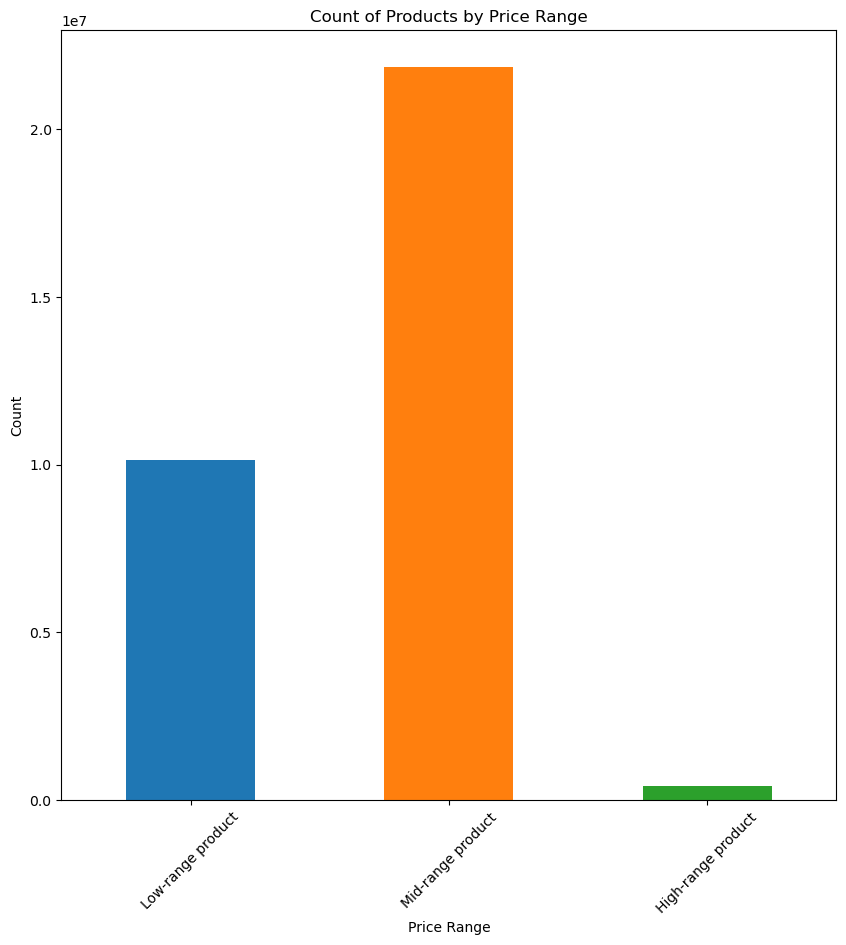

In [22]:
# Plot the price ranges w/o NaN
price_range_counts = ords_prods_merge['price_range'].value_counts(dropna = True)

# Define the order for the x-axis
desired_order = ['Low-range product', 'Mid-range product', 'High-range product']

# Reindex the value counts to match the desired order
price_range_counts = price_range_counts.reindex(desired_order)

price_range_counts.plot(kind='bar', figsize=(10, 10), color=['#1f77b4', '#ff7f0e', '#2ca02c'])

plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Count of Products by Price Range')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_price-range_counts.png')) # Save the plot

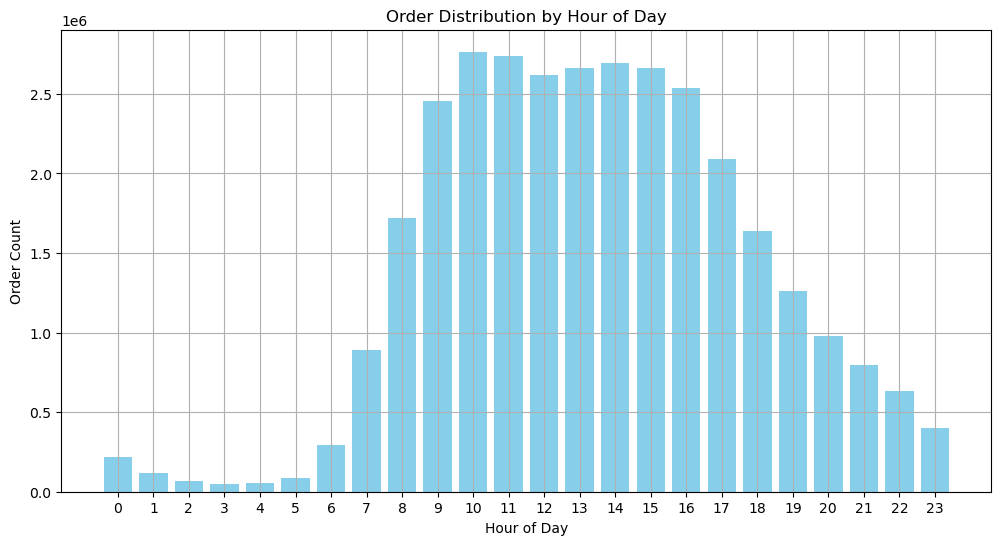

In [70]:
# Plot the distribution of busy hours
import matplotlib.pyplot as plt

data = {
    'order_hour_of_day': [10, 11, 14, 15, 13, 12, 16, 9, 17, 8, 18, 19, 20, 7, 21, 22, 23, 6, 0, 1, 5, 2, 4, 3],
    'count': [2764476, 2738647, 2691598, 2664583, 2663346, 2620898, 2537506, 2456751, 2089510, 1719991, 1637956, 1259416, 977049, 891951, 796379, 634743, 402621, 290796, 218951, 115787, 88064, 69435, 53284, 51321]
}

# Create dataframe
df = pd.DataFrame(data)

# Plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(df['order_hour_of_day'], df['count'], color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Order Count')
plt.title('Order Distribution by Hour of Day')
plt.xticks(df['order_hour_of_day'])
plt.grid(True)
plt.show()

In [64]:
ords_prods_merge.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,1st_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,_merge,price_range
0,0,0,2539329,1,1,2,8,NaN,True,196,1,0,195.0,Soda,77.0,7.0,9.0,both,Mid-range product
1,0,0,2539329,1,1,2,8,NaN,True,14084,2,0,14084.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product
2,0,0,2539329,1,1,2,8,NaN,True,12427,3,0,12427.0,Original Beef Jerky,23.0,19.0,4.4,both,Low-range product
3,0,0,2539329,1,1,2,8,NaN,True,26088,4,0,26089.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,Low-range product
4,0,0,2539329,1,1,2,8,NaN,True,26405,5,0,26406.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,Low-range product


### Check how busy each day is

In [65]:
# Show amount of order in each weekday (0 = Saturday, ... , 4 = Friday)
ords_prods_merge['order_day_of_week'].value_counts(dropna=False)

order_day_of_week
0    6209808
1    5665951
6    4500391
2    4217868
5    4209603
3    3844175
4    3787263
Name: count, dtype: int64

In [66]:
# Create a list with classification of how busy different week days are
result = []

for value in ords_prods_merge["order_day_of_week"]:
  if value == 0 or value == 1:
    result.append("Busiest day")
  elif value ==3 or value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [41]:
result

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Reg

In [67]:
# Create a column with classification of how busy different week days are
ords_prods_merge['busiest_days'] = result
ords_prods_merge['busiest_days'].value_counts(dropna=False)

busiest_days
Regularly busy    12927862
Busiest day       11875759
Least busy         7631438
Name: count, dtype: int64

In [68]:
ords_prods_merge.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,1st_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,_merge,price_range,busiest_days
0,0,0,2539329,1,1,2,8,NaN,True,196,1,0,195.0,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy
1,0,0,2539329,1,1,2,8,NaN,True,14084,2,0,14084.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product,Regularly busy
2,0,0,2539329,1,1,2,8,NaN,True,12427,3,0,12427.0,Original Beef Jerky,23.0,19.0,4.4,both,Low-range product,Regularly busy
3,0,0,2539329,1,1,2,8,NaN,True,26088,4,0,26089.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,Low-range product,Regularly busy
4,0,0,2539329,1,1,2,8,NaN,True,26405,5,0,26406.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,Low-range product,Regularly busy


### Check how busy each hour is

In [69]:
# Show amount of orders in each hour
ords_prods_merge['order_hour_of_day'].value_counts(dropna=False)

order_hour_of_day
10    2764476
11    2738647
14    2691598
15    2664583
13    2663346
12    2620898
16    2537506
9     2456751
17    2089510
8     1719991
18    1637956
19    1259416
20     977049
7      891951
21     796379
22     634743
23     402621
6      290796
0      218951
1      115787
5       88064
2       69435
4       53284
3       51321
Name: count, dtype: int64

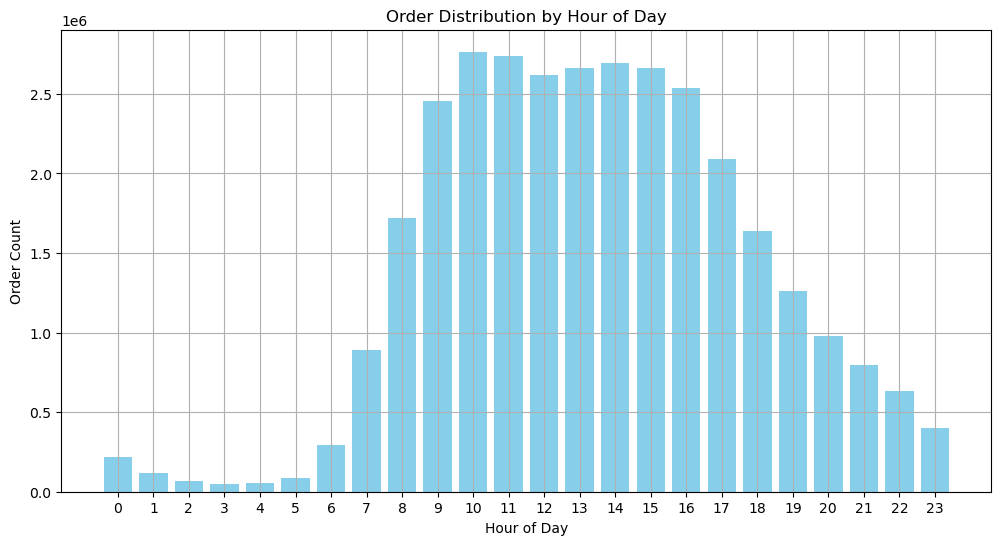

In [70]:
# Plot the distribution of busy hours
data = {
    'order_hour_of_day': [10, 11, 14, 15, 13, 12, 16, 9, 17, 8, 18, 19, 20, 7, 21, 22, 23, 6, 0, 1, 5, 2, 4, 3],
    'count': [2764476, 2738647, 2691598, 2664583, 2663346, 2620898, 2537506, 2456751, 2089510, 1719991, 1637956, 1259416, 977049, 891951, 796379, 634743, 402621, 290796, 218951, 115787, 88064, 69435, 53284, 51321]
}

# Create dataframe
df = pd.DataFrame(data)

# Plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(df['order_hour_of_day'], df['count'], color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Order Count')
plt.title('Order Distribution by Hour of Day')
plt.xticks(df['order_hour_of_day'])
plt.grid(True)
plt.show()

#### The list we get is ordered from the busiest to least busy hours. To have a better view over this orders distribution we plotted it over time. It looks like between 23 and 6 am it's the least busy period, the most busy period is between 9 and 16, the rest falls into the regular ordering.

In [71]:
# Create a list with classification of how busy periods of the day are
result = []

for value in ords_prods_merge["order_hour_of_day"]:
  if value in [9,10,11,12,13,14,15,16]:
    result.append("Most orders")
  elif value in [23,0,1,2,3,4,5,6]:
    result.append("Fewest orders")
  else:
    result.append("Average orders")

In [72]:
# Create a column with classification of how busy periods of the day are
ords_prods_merge['busiest_period_of_day'] = result
ords_prods_merge['busiest_period_of_day'].value_counts(dropna=False)

busiest_period_of_day
Most orders       21137805
Average orders    10006995
Fewest orders      1290259
Name: count, dtype: int64

In [73]:
ords_prods_merge.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,1st_order,product_id,...,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,_merge,price_range,busiest_days,busiest_period_of_day
0,0,0,2539329,1,1,2,8,NaN,True,196,...,0,195.0,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Average orders
1,0,0,2539329,1,1,2,8,NaN,True,14084,...,0,14084.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product,Regularly busy,Average orders
2,0,0,2539329,1,1,2,8,NaN,True,12427,...,0,12427.0,Original Beef Jerky,23.0,19.0,4.4,both,Low-range product,Regularly busy,Average orders
3,0,0,2539329,1,1,2,8,NaN,True,26088,...,0,26089.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,Low-range product,Regularly busy,Average orders
4,0,0,2539329,1,1,2,8,NaN,True,26405,...,0,26406.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,Low-range product,Regularly busy,Average orders


# Exporting file

In [ ]:
# Export data to pkl
ords_prods_merge.to_pickle(os.path.join(path, '02_Data','Prepared_Data', 'ords_prods_merge_new.pkl'))